<a href="https://colab.research.google.com/github/ignaciovaldes/inteligencia-artificial-y-aprendizaje-automatico/blob/main/SVD_Equipo42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

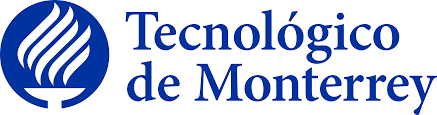

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 10**
###**Reducción de Dimensionalidad - Descomposición en Valores Singulares (SVD) y Sistemas de Recomendación**


**Nombres y matrículas de los integrantes del equipo:**

*  Norma de los Ángeles García López A01228278
*  Ramón Ariel Iván Muñoz Corona A01330566
*  Denisse María Ramírez Colmenero A01561497
*  Ignacio Valdés Reyes  A01793262
*  Rigoberto Vega Escudero. A01793132  


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd
from google.colab import drive
from sklearn.decomposition import TruncatedSVD

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
link1 = '/content/drive/MyDrive/Colab Notebooks/Inteligencia Artificial/Actividad 11/geoplaces2.csv'
link2 = '/content/drive/MyDrive/Colab Notebooks/Inteligencia Artificial/Actividad 11/rating_final.csv'

#**Ejercicio-1.** 

1. Descarga los archivos y genera la matriz de utilidad en la cual los renglones son los usuarios (user_ID), las columnas los nombres de los restaurantes (name) y las entradas la evaluaciones generales dadas por los usuarios (rating). En particular indica el tamaño de dicha matriz y despliega
sus primeros 10 renglones. 


In [ ]:
pd_geoplaces = pd.read_csv(link1,encoding='latin-1')
print("===> GEOPLACES <===")
print("SHAPE: ", pd_geoplaces.shape)
print("COLUMNS: ", list(pd_geoplaces.columns))
display(pd_geoplaces.head(10))
pd_ratings = pd.read_csv(link2,encoding='latin-1')
print("===> RATINGS <===")
print("SHAPE: ", pd_ratings.shape)
print("COLUMNS: ", list(pd_ratings.columns))
display(pd_ratings.head(10))

===> GEOPLACES <===
SHAPE:  (130, 21)
COLUMNS:  ['placeID', 'latitude', 'longitude', 'the_geom_meter', 'name', 'address', 'city', 'state', 'country', 'fax', 'zip', 'alcohol', 'smoking_area', 'dress_code', 'accessibility', 'price', 'url', 'Rambience', 'franchise', 'area', 'other_services']


,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rincón de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none
5,135040,22.135617,-100.969709,0101000020957F00001B552189B84A58C15A2AAEFD2CA2...,Restaurant los Compadres,Camino a Simon Diaz 155 Centro,San Luis Potosi,SLP,Mexico,?,...,Wine-Beer,none,informal,no_accessibility,high,?,familiar,f,closed,none
6,132732,23.754357,-99.171288,0101000020957F00008A20E615808157C16272FECBF84F...,Taqueria EL amigo,Calle Mezquite Fracc Framboyanes,Cd Victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,none,casual,completely,low,?,familiar,f,open,none
7,132875,22.149901,-100.993779,0101000020957F00008A2A0747DE4758C11EB31D2A31A8...,shi ro ie,?,?,?,?,?,...,Wine-Beer,section,informal,no_accessibility,high,?,familiar,t,open,Internet
8,132609,23.760268,-99.165865,0101000020957F0000A478418BBA8057C133851EB22C4E...,Pollo_Frito_Buenos_Aires,tampico,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,not permitted,informal,completely,low,?,quiet,t,closed,none
9,135082,22.151448,-100.915099,0101000020957F0000A29FAF95CD4958C1FEEEBB73A991...,la Estrella de Dimas,Villa de Pozos 192 Villa de Pozos,San Luis Potosi,SLP,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,?,familiar,f,closed,none


===> RATINGS <===
SHAPE:  (1161, 5)
COLUMNS:  ['userID', 'placeID', 'rating', 'food_rating', 'service_rating']


,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
5,U1068,132740,0,0,0
6,U1068,132663,1,1,1
7,U1068,132732,0,0,0
8,U1068,132630,1,1,1
9,U1067,132584,2,2,2


In [ ]:
matriz_ratings = pd_ratings[[ 'userID','placeID','rating']] 
matriz_ratings.describe()

,placeID,rating
count,1161.000000,1161.000000
mean,134192.041344,1.199828
std,1100.916275,0.773282
min,132560.000000,0.000000
25%,132856.000000,1.000000
50%,135030.000000,1.000000
75%,135059.000000,2.000000
max,135109.000000,2.000000


In [ ]:
matriz_geoplace = pd_geoplaces[['name', 'placeID']] 
matriz_geoplace.describe()

,placeID
count,130.000000
mean,134012.784615
std,1140.644582
min,132560.000000
25%,132831.000000
50%,134994.000000
75%,135050.750000
max,135109.000000


In [ ]:
tabla_relacional = pd.merge(matriz_ratings, matriz_geoplace, on='placeID')   # dataFrame

tabla_relacional

,userID,placeID,rating,name
0,U1077,135085,2,Tortas Locas Hipocampo
1,U1108,135085,1,Tortas Locas Hipocampo
2,U1081,135085,1,Tortas Locas Hipocampo
3,U1056,135085,2,Tortas Locas Hipocampo
4,U1134,135085,2,Tortas Locas Hipocampo
...,...,...,...,...
1156,U1061,132958,2,tacos los volcanes
1157,U1025,132958,1,tacos los volcanes
1158,U1097,132958,2,tacos los volcanes
1159,U1096,132958,1,tacos los volcanes


In [ ]:
tabla_relacional.shape  

(1161, 4)

In [ ]:
matriz_utilidad = tabla_relacional.pivot_table(values='rating', index='userID', columns='name', fill_value=0)

matriz_utilidad.head(10)

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El RincÃ³n de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
U1001,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
U1002,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
U1003,0,0,2,0,0,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
U1004,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
U1005,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1006,0,0,0,1,0,0,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
U1007,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1008,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1009,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
matriz_utilidad.shape

(138, 129)

In [ ]:
print('Total de elementos de la matriz de utilidad: %d' % (matriz_utilidad.size))
print('Total de elementos diferentes de cero: %d' % (np.count_nonzero(matriz_utilidad)))
print('Porcentaje de elementos diferentes de cero: %.1f%%' % (100 * np.count_nonzero(matriz_utilidad) / matriz_utilidad.size))

Total de elementos de la matriz de utilidad: 17802
Total de elementos diferentes de cero: 907
Porcentaje de elementos diferentes de cero: 5.1%


#**Ejercicio-2.**

2. Con el objetivo de obtener la información con respecto a los vectores latentes de los restaurantes, obtener dicha factorización SVD utilizando todas las componentes posibles, es decir, usando todos sus valores singulares. En particular indica la cantidad de valores singulares obtenidos

In [ ]:
X = matriz_utilidad.T     # Tomamos la traspuesta para que los renglones sean los restaunrantes y las columnas los usuarios.
X.shape

(129, 138)

In [ ]:
 # El número de componentes debe ser menor que el número de características (features/usuarios), que son 138:
SVD = TruncatedSVD(n_components=137, random_state=42)  
SVD.fit(X)
matriz_final = SVD.transform(X)
print("La cantidad de valores singulares es: ",len(SVD.singular_values_))

La cantidad de valores singulares es:  129


#**Ejercicio-3.**

3. Usando la métrica de correlación de Pearon, obtener las 10 mejores recomendaciones de este modelo no supervisado con base a la información de alguien que evaluó bien de manera general al “Subway”. Despliega también el valor numérico de la correlación de Pearson de cada una de estas 10 recomendaciones. NOTA: No debe estar incluido “Subway” dentro de las recomendaciones. 


In [ ]:
corr_matrix = np.corrcoef(matriz_final, )

corr_matrix.shape

(129, 129)

In [ ]:
rating_sub = 'Subway'

names = matriz_utilidad.columns
names_list = list(names)
id_rating_sub = names_list.index(rating_sub)

id_rating_sub

88

In [ ]:
# Veamos la correlación de Subway, con todas las que se tienen en el catálogo:

corr_recomienda = corr_matrix[id_rating_sub]
print(corr_recomienda.shape)
print(corr_recomienda)

(129,)
[-7.69028369e-04 -7.87822168e-05 -5.27330975e-03  8.58511349e-04
 -3.03891148e-03  3.97495832e-05 -1.54820208e-03 -5.29347145e-03
  7.27520383e-04 -1.55098452e-03 -1.84483094e-03  3.01090491e-01
 -3.06938616e-05 -3.66639157e-03 -2.28024815e-03 -1.70971180e-03
  2.66961340e-03  4.58467365e-04 -2.11449533e-03 -6.20445134e-03
  3.34268563e-03  1.16598607e-01  1.87080102e-03  2.53682556e-03
 -5.48801141e-03 -2.91288266e-03  2.02825342e-03 -1.36607265e-03
 -2.01695899e-03  1.12058244e-01 -2.36235727e-03  6.52159239e-04
  3.53495770e-03 -3.62793330e-03  1.69065407e-03 -4.51837401e-03
 -2.09301342e-03  2.34634298e-01 -3.80413494e-03 -5.11845710e-04
 -2.27148704e-03  3.88178002e-01 -2.07427108e-03 -2.29428835e-03
  1.32565455e-03  3.01002479e-01  1.71433518e-01 -3.29715354e-03
 -4.74480596e-03 -8.02527884e-04 -2.65071452e-03  1.12018889e-01
 -3.91080724e-03 -2.06369812e-03  1.16008629e-01  2.27855804e-01
  4.28342495e-04 -8.69739761e-04  6.09520875e-01 -6.43364064e-03
  4.25467169e-01 -

In [ ]:
corr_recomienda[id_rating_sub]

0.9999999999999999

In [ ]:
top10 = list(names[(corr_recomienda > 0.23)& (corr_recomienda < 0.99)])
print("Total de nombres: ", len(top10))
top10

Total de nombres:  10


['Chilis Cuernavaca',
 'Log Yin',
 'Mariscos Tia Licha',
 'Mikasa',
 'Restaurant Teely',
 'Restaurant and Bar and Clothesline Carlos N Charlies',
 'Restaurant los Pinos',
 'Rincon del Bife',
 'Sanborns Casa Piedra',
 'Vips']

In [ ]:
top10_valores = list(corr_recomienda[(corr_recomienda > 0.23)& (corr_recomienda < 0.99)])
print("Total de nombres: ", len(top10_valores))
top10_valores

Total de nombres:  10


[0.30109049104496177,
 0.23463429773398808,
 0.38817800185257667,
 0.3010024785497629,
 0.6095208746935283,
 0.4254671689089196,
 0.2851492197329665,
 0.4298238308559136,
 0.4172185013479314,
 0.5062776799760981]

In [ ]:
def GetTop10(sRest, PearsonCorr, matriz):
    idRest = matriz.columns.get_loc(sRest)
    names = matriz.columns
    corrRest = PearsonCorr[idRest]
       
    dfTop = pd.DataFrame(data = [])
    dfTop["Restaurantes"] = names
    dfTop["Correlation"] = corrRest
    
    dfTop10 = dfTop.sort_values(by = "Correlation", ascending = False).head(11).copy()
    dfTop10 = dfTop10.iloc[1: , :]
    dfTop10 = dfTop10.reset_index(drop=True)
    display(dfTop10)

In [ ]:
dfTop10Subway = GetTop10("Subway",corr_matrix, matriz_utilidad)

,Restaurantes,Correlation
0,Restaurant Teely,0.609521
1,Vips,0.506278
2,Rincon del Bife,0.429824
3,Restaurant and Bar and Clothesline Carlos N Ch...,0.425467
4,Sanborns Casa Piedra,0.417219
5,Mariscos Tia Licha,0.388178
6,Chilis Cuernavaca,0.301090
7,Mikasa,0.301002
8,Restaurant los Pinos,0.285149
9,Log Yin,0.234634


#**Ejercicio-4.**

4. Disminuye ahora la dimensión de la factorización con un número de componentes tal, que las recomendaciones con esta menor cantidad de información coincidan en al menos 9 de las 10 recomendaciones dadas con todos los valores singulares. Indica la cantidad de valores singulares encontrado y la cantidad de información que contienen. 

In [ ]:
num_sv = 8

SVD = TruncatedSVD(n_components=137, random_state=1)  
SVD.fit(X)
    

SVD_busqueda = TruncatedSVD(n_components=num_sv, random_state=42)
SVD_busqueda.fit(X)

facto_matrix = SVD_busqueda.fit_transform(X)
print(facto_matrix.shape)
matriz_corr_busqueda = np.corrcoef(facto_matrix, )
matriz_recomendacion = matriz_corr_busqueda[id_rating_sub]

top_ratings = list(names[(matriz_recomendacion > 0.999955)& (matriz_recomendacion < 1)])
print("Total de recomendaciones generadas:",len(top_ratings),"\n")

   
print(f'Cantidad de información simplificada con los primeros %d vectores singulares:' % num_sv)
print(f'%.1f%%' %  (100 * (1- (SVD.singular_values_[0:num_sv]).sum() / (SVD.singular_values_).sum())))

(129, 8)
Total de recomendaciones generadas: 10 

Cantidad de información simplificada con los primeros 8 vectores singulares:
79.3%


In [ ]:
facto_matrix

array([[ 2.23153076e-01, -3.35083975e-01,  9.24826442e-01, ...,
         7.68375864e-01,  4.22568006e-01, -4.25050388e-01],
       [-3.28198340e-07,  5.87174895e-06,  1.98372392e-04, ...,
         2.83644714e-05,  2.56107929e-03, -2.60614037e-03],
       [ 3.04948519e+00,  2.56512022e+00, -4.84698608e-01, ...,
         1.40243494e+00,  4.99001162e-01,  8.64577211e-01],
       ...,
       [ 8.68872802e-01,  1.45553801e+00,  1.81018058e+00, ...,
        -6.81932222e-01, -2.03051028e-01,  8.29327647e-01],
       [ 1.24176702e-07,  9.17015814e-05, -1.17903024e-03, ...,
         4.20614119e-03,  7.97677753e-03, -2.66320685e-03],
       [ 7.87479411e-07,  2.35769543e-04, -4.00898954e-03, ...,
         8.04080599e-03,  1.83246208e-02, -1.74972052e-03]])

In [ ]:
dfTop10Ex4 = GetTop10("Subway",matriz_corr_busqueda, matriz_utilidad)

,Restaurantes,Correlation
0,Restaurant Teely,0.999997
1,Rincon del Bife,0.999993
2,Paniroles,0.999987
3,Restaurant and Bar and Clothesline Carlos N Ch...,0.999983
4,Mariscos Tia Licha,0.999983
5,Chilis Cuernavaca,0.999980
6,Vips,0.999977
7,Mikasa,0.999977
8,Sanborns Casa Piedra,0.999971
9,Restaurant los Pinos,0.999958


#**Ejercicio-5.**

5. Repite el ejercicio con el restaurante “"tacos de barbacoa enfrente del Tec". Incluye tus conclusiones.

In [ ]:
rating_sub2 = "tacos de barbacoa enfrente del Tec"
id_rating_sub2 = names_list.index(rating_sub2)
id_rating_sub2

corr_recomienda2 = corr_matrix[id_rating_sub2]
print(corr_recomienda2.shape)
print(corr_recomienda2)

(129,)
[ 1.90365985e-03  1.95018219e-04  1.30535991e-02 -2.12516683e-03
  7.52254923e-03 -9.83964813e-05  3.83243356e-03  1.31035076e-02
  4.07794920e-01  3.83932124e-03  4.56671136e-03  1.56152873e-03
  7.59798653e-05  9.07581917e-03  5.64454708e-03  4.23223620e-03
 -6.60838540e-03 -1.13489430e-03  5.23424104e-03  1.53585555e-02
 -8.27451453e-03  4.82434184e-03 -4.63099792e-03 -6.27968115e-03
  1.48442849e-01  1.91120451e-01 -5.02075704e-03  3.38158871e-03
  4.99279870e-03  5.56810594e-03  5.84780076e-03 -1.61436094e-03
 -8.75046657e-03  8.98061922e-03 -4.18506052e-03  1.11848243e-02
  2.58479385e-01  1.27230718e-02  9.41679037e-03  1.26702755e-03
  5.62285977e-03  5.74403685e-03  5.13466958e-03  5.67930233e-03
 -3.28153738e-03  1.83689220e-03  1.11393805e-02  8.16180397e-03
  1.17453360e-02  1.98658485e-03  6.56160293e-03  5.69993965e-03
  9.68084797e-03  5.10849717e-03  6.85473722e-03 -3.44059875e-03
 -1.06032292e-03  2.15296175e-03  1.33109496e-04  1.59258928e-02
  6.48831289e-03  

In [ ]:
len(X.columns)

138

In [ ]:
SVD_Tacos = TruncatedSVD(n_components = (len(list(X.columns)) - 1), random_state = 42 )
dfTacos = SVD_Tacos.fit_transform(X)
print("Singular Values: ", len(SVD_Tacos.singular_values_))
print("SVD Factor Shape: ", dfTacos.shape)
PearsCorrTacos = np.corrcoef(dfTacos)
print(PearsCorrTacos.shape)
dfTop10Tacos = GetTop10(rating_sub2,PearsCorrTacos, matriz_utilidad)

Singular Values:  129
SVD Factor Shape:  (129, 129)
(129, 129)


,Restaurantes,Correlation
0,vips,0.817189
1,tacos abi,0.665305
2,little pizza Emilio Portes Gil,0.653849
3,Taqueria EL amigo,0.437184
4,puesto de gorditas,0.412765
5,Carreton de Flautas y Migadas,0.407795
6,Little Cesarz,0.258479
7,palomo tec,0.195174
8,Hamburguesas La perica,0.191120
9,carnitas mata calle Emilio Portes Gil,0.170939


In [ ]:
SVD_Tacos2 = TruncatedSVD(n_components = 8, random_state = 42 )
dfTacos2 = SVD_Tacos2.fit_transform(X)
print("Singular Values: ", len(SVD_Tacos2.singular_values_))
print("SVD Factor Shape: ", dfTacos2.shape)
PearsCorrTacos2 = np.corrcoef(dfTacos2)
print(PearsCorrTacos2.shape)
dfTop10Tacos2 = GetTop10(rating_sub2,PearsCorrTacos2, matriz_utilidad)

Singular Values:  8
SVD Factor Shape:  (129, 8)
(129, 129)


,Restaurantes,Correlation
0,carnitas_mata,0.999963
1,little pizza Emilio Portes Gil,0.999918
2,vips,0.999907
3,tacos abi,0.999862
4,Taqueria EL amigo,0.999842
5,Pollo_Frito_Buenos_Aires,0.999795
6,palomo tec,0.999696
7,puesto de gorditas,0.999536
8,Gorditas Dona Tota,0.998467
9,Little Cesarz,0.997947


In [ ]:
num_sv = 8

SVD2 = TruncatedSVD(n_components=137, random_state=1)  
SVD2.fit(X)
    

SVD_busqueda2 = TruncatedSVD(n_components=num_sv, random_state=42)
SVD_busqueda2.fit(X)

facto_matrix2 = SVD_busqueda2.fit_transform(X)
print(facto_matrix2.shape)
matriz_corr_busqueda2 = np.corrcoef(facto_matrix2, )
matriz_recomendacion2 = matriz_corr_busqueda2[id_rating_sub2]

top_ratings2 = list(names[(matriz_recomendacion2 > 0.997947)& (matriz_recomendacion2 < 1)])
print("Total de recomendaciones generadas:",len(top_ratings2),"\n")

print(f'Cantidad de información simplificada con los primeros %d vectores singulares:' % num_sv)
print(f'%.1f%%' %  (100 * (1- (SVD.singular_values_[0:num_sv]).sum() / (SVD.singular_values_).sum())))

(129, 8)
Total de recomendaciones generadas: 10 

Cantidad de información simplificada con los primeros 8 vectores singulares:
79.3%


###Conclusiones.

Podemos notar que una reducción de la información casi en la misma magnitud que lo logrado con Subway. Es de creer que aun con la cantidad de usuarios que consumen Subway debe ser mucho mayor a los que consumen los Tacos de Barbacoa, esto diferenciando un flujo de clientes y principalmente el alcance de las marcas, esto no diciendo nada sobre calidad u otra cosa. Pero aun así en ambos casos el modelo con estas diferencias fue capaz de encontrar una reducción de la información bastante buena.



#**Ejercicio-6.**

6. Repite los ejercicios 1 a 4 generando ahora la matriz de utilidad en la cual los renglones son los usuarios (user_ID), las columnas los nombres de los restaurantes (name) y las entradas la evaluación dada a la comida (food_rating). Incluye tus conclusiones. 

In [ ]:
matriz_ratings_food2 = pd_ratings[[ 'userID','food_rating','placeID']] 
matriz_geo_food2 = pd_geoplaces[['name', 'placeID']] 

tabla_relacional_food2 = pd.merge(matriz_geo_food2,matriz_ratings_food2, on='placeID')   
tabla_relacional_food2

,name,placeID,userID,food_rating
0,Kiku Cuernavaca,134999,U1093,2
1,Kiku Cuernavaca,134999,U1066,1
2,Kiku Cuernavaca,134999,U1040,1
3,Kiku Cuernavaca,134999,U1110,2
4,Kiku Cuernavaca,134999,U1121,2
...,...,...,...,...
1156,Restaurant Bar Coty y Pablo,135019,U1121,2
1157,sirloin stockade,132877,U1047,0
1158,sirloin stockade,132877,U1111,1
1159,sirloin stockade,132877,U1015,1


In [ ]:
matriz_utilidad2 = tabla_relacional_food2.pivot_table(values = "food_rating", index = "userID", columns='name', fill_value=0)
print("===> UTILITY MATRIX <===")
print("SHAPE: ", matriz_utilidad2.shape)
display(matriz_utilidad2.head(10))

===> UTILITY MATRIX <===
SHAPE:  (138, 129)


name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El RincÃ³n de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
U1001,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
U1002,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
U1003,0,0,2,0,0,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
U1004,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
U1005,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1006,0,0,0,0,0,0,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
U1007,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1008,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1009,0,0,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
X2 = matriz_utilidad2.T     # Tomamos la traspuesta para que los renglones sean las películas y las columnas los usuarios.
 # El número de componentes debe ser menor que el número de características (features/usuarios), que son 943:
SVD3 = TruncatedSVD(n_components=137, random_state=42)  
SVD3.fit(X2)
matriz_final3 = SVD3.transform(X2)
print("La cantidad de valores singulares es: ",len(SVD3.singular_values_))

La cantidad de valores singulares es:  129


In [ ]:
rating_sub3 = 'Subway'

names3 = matriz_utilidad2.columns
names_list3 = list(names3)
id_rating_sub3 = names_list3.index(rating_sub3)

id_rating_sub3

88

In [ ]:
SVD2 = TruncatedSVD(n_components = (len(list(X2.columns)) - 1), random_state = 42 )
df2 = SVD2.fit_transform(X2)
print("SVD Factor Shape: ", df2.shape)
print("Singular Values: ", len(SVD2.singular_values_))
PearsCorr2 = np.corrcoef(df2)
print(PearsCorr2.shape)
dfTop10Subway2 = GetTop10(rating_sub3,PearsCorr2, matriz_utilidad2)

SVD Factor Shape:  (129, 129)
Singular Values:  129
(129, 129)


,Restaurantes,Correlation
0,Restaurant Teely,0.816413
1,Restaurant and Bar and Clothesline Carlos N Ch...,0.468950
2,Vips,0.442148
3,Mariscos Tia Licha,0.415222
4,Rincon del Bife,0.381819
5,Sanborns Casa Piedra,0.365657
6,Restaurant Las Mananitas,0.331707
7,Paniroles,0.312082
8,Kiku Cuernavaca,0.250357
9,Restaurant Familiar El Chino,0.232708


In [ ]:
SVD_Sec2 = TruncatedSVD(n_components = 8, random_state = 42 )
dfEx64 = SVD_Sec2.fit_transform(X2)
print("SVD Factor Shape: ", dfEx64.shape)
print("Singular Values: ", len(SVD_Sec2.singular_values_))
PearsCorrEx64 = np.corrcoef(dfEx64)
print(PearsCorrEx64.shape)
dfTop10Ex64 = GetTop10(rating_sub3,PearsCorrEx64, matriz_utilidad2)

SVD Factor Shape:  (129, 8)
Singular Values:  8
(129, 129)


,Restaurantes,Correlation
0,Vips,0.999990
1,Mikasa,0.999989
2,Mariscos Tia Licha,0.999988
3,Sanborns Casa Piedra,0.999984
4,Restaurant Teely,0.999984
5,Rincon del Bife,0.999983
6,McDonalds Centro,0.999974
7,Paniroles,0.999973
8,Restaurant Las Mananitas,0.999973
9,Restaurant and Bar and Clothesline Carlos N Ch...,0.999971


In [ ]:
num_sv = 8
SVD3 = TruncatedSVD(n_components=137, random_state=1)  
SVD3.fit(X2)
    

SVD_busqueda3 = TruncatedSVD(n_components=num_sv, random_state=42)
SVD_busqueda3.fit(X2)

facto_matrix3 = SVD_busqueda3.fit_transform(X2)
print(facto_matrix3.shape)
matriz_corr_busqueda3 = np.corrcoef(facto_matrix3, )
matriz_recomendacion3 = matriz_corr_busqueda3[id_rating_sub3]

top_ratings_3 = list(names[(matriz_recomendacion3 > 0.999971)& (matriz_recomendacion3 < 0.999990)])
print("Total de recomendaciones generadas:",len(top_ratings_3),"\n")

   
print(f'Cantidad de información simplificada con los primeros %d vectores singulares:' % num_sv)
print(f'%.1f%%' %  (100 * (1- (SVD3.singular_values_[0:num_sv]).sum() / (SVD3.singular_values_).sum())))

(129, 8)
Total de recomendaciones generadas: 9 

Cantidad de información simplificada con los primeros 8 vectores singulares:
79.7%


###Conclusiones.

En comparación a basar las relaciones de dimensionalidad que vimos en el ejercicio 4 y 5, para este modelo basarnos en la food_rating tuvimos una mejor reducción de la información, además que incluso los ratings se condensaron muchísimos mejor. Pero lo mejor de este modelo fue una mejor correlación de las variables, esto queriendo decir que el Food_rating tiene un mejor uso para encontrar estas recomendaciones para el usuario.



#**Ejercicio-7.**

7. Repite los ejercicios 1 a 4 generando ahora la matriz de utilidad en la cual los renglones son los usuarios (user_ID), las columnas los nombres de los restaurantes (name) y las entradas la evaluación dada al servicio (service_rating). Incluye tus conclusiones. 


In [ ]:
matriz_ratings_food3 = pd_ratings[[ 'userID','service_rating','placeID']] 
matriz_geo_food3 = pd_geoplaces[['name', 'placeID']] 

tabla_relacional_food3 = pd.merge(matriz_geo_food3,matriz_ratings_food3, on='placeID')   
tabla_relacional_food3

,name,placeID,userID,service_rating
0,Kiku Cuernavaca,134999,U1093,2
1,Kiku Cuernavaca,134999,U1066,1
2,Kiku Cuernavaca,134999,U1040,1
3,Kiku Cuernavaca,134999,U1110,2
4,Kiku Cuernavaca,134999,U1121,2
...,...,...,...,...
1156,Restaurant Bar Coty y Pablo,135019,U1121,2
1157,sirloin stockade,132877,U1047,0
1158,sirloin stockade,132877,U1111,1
1159,sirloin stockade,132877,U1015,2


In [ ]:
matriz_utilidad3 = tabla_relacional_food3.pivot_table(values = "service_rating", index = "userID", columns='name', fill_value=0)
print("===> UTILITY MATRIX <===")
print("SHAPE: ", matriz_utilidad3.shape)
display(matriz_utilidad3.head(10))

===> UTILITY MATRIX <===
SHAPE:  (138, 129)


name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El RincÃ³n de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
U1001,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
U1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1003,0,0,2,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
U1004,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
U1005,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1006,0,0,0,1,0,0,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
U1007,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1008,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
U1009,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X3 = matriz_utilidad3.T     # Tomamos la traspuesta para que los renglones sean las películas y las columnas los usuarios.
 # El número de componentes debe ser menor que el número de características (features/usuarios), que son 943:
SVD4 = TruncatedSVD(n_components=137, random_state=42)  
SVD4.fit(X3)
matriz_final4 = SVD4.transform(X3)
print("La cantidad de valores singulares es: ",len(SVD4.singular_values_))

La cantidad de valores singulares es:  129


In [ ]:
rating_sub4 = 'Subway'

names4 = matriz_utilidad3.columns
names_list4 = list(names4)
id_rating_sub4 = names_list4.index(rating_sub4)

id_rating_sub4

88

In [ ]:
SVD3 = TruncatedSVD(n_components = (len(list(X3.columns)) - 1), random_state = 42 )
df3 = SVD3.fit_transform(X3)
print("SVD Factor Shape: ", df3.shape)
print("Singular Values: ", len(SVD3.singular_values_))
PearsCorr3 = np.corrcoef(df3)
print(PearsCorr3.shape)
dfTop10Subway3 = GetTop10(rating_sub4,PearsCorr3, matriz_utilidad3)

SVD Factor Shape:  (129, 129)
Singular Values:  129
(129, 129)


,Restaurantes,Correlation
0,Restaurant Teely,0.772973
1,Restaurant and Bar and Clothesline Carlos N Ch...,0.600161
2,Rincon del Bife,0.518731
3,Vips,0.421200
4,Paniroles,0.365934
5,Chilis Cuernavaca,0.230698
6,Restaurant Las Mananitas,0.226266
7,Giovannis,0.192760
8,Restaurant Familiar El Chino,0.182869
9,Kiku Cuernavaca,0.178740


In [ ]:
SVD_Sec3 = TruncatedSVD(n_components = 8, random_state = 42 )
dfEx74 = SVD_Sec3.fit_transform(X3)
print("SVD Factor Shape: ", dfEx74.shape)
print("Singular Values: ", len(SVD_Sec3.singular_values_))
PearsCorrEx74 = np.corrcoef(dfEx74)
print(PearsCorrEx74.shape)
dfTop10Ex74 = GetTop10(rating_sub4,PearsCorrEx74, matriz_utilidad3)

SVD Factor Shape:  (129, 8)
Singular Values:  8
(129, 129)


,Restaurantes,Correlation
0,Rincon del Bife,0.999993
1,Restaurant Teely,0.999963
2,Restaurant and Bar and Clothesline Carlos N Ch...,0.999961
3,Chilis Cuernavaca,0.999938
4,Log Yin,0.999912
5,Vips,0.999895
6,Paniroles,0.999839
7,Sanborns Casa Piedra,0.999819
8,Restaurant Bar Coty y Pablo,0.999725
9,El Oceano Dorado,0.999698


In [ ]:
num_sv = 8

SVD4 = TruncatedSVD(n_components=137, random_state=1)  
SVD4.fit(X3)
    

SVD_busqueda4 = TruncatedSVD(n_components=num_sv, random_state=42)
SVD_busqueda4.fit(X3)

facto_matrix4 = SVD_busqueda4.fit_transform(X3)
print(facto_matrix4.shape)
matriz_corr_busqueda4 = np.corrcoef(facto_matrix4, )
matriz_recomendacion4 = matriz_corr_busqueda4[id_rating_sub4]

top_ratings_4 = list(names[(matriz_recomendacion4 > 0.00)& (matriz_recomendacion4 < 1)])
print("Total de recomendaciones generadas: 10\n")
 
print(f'Cantidad de información simplificada con los primeros %d vectores singulares:' % num_sv)
print(f'%.1f%%' %  (100 * (1- (SVD4.singular_values_[0:num_sv]).sum() / (SVD4.singular_values_).sum())))

(129, 8)
Total de recomendaciones generadas: 10

Cantidad de información simplificada con los primeros 8 vectores singulares:
79.3%


###Conclusiones.

Nuevamente en en comparación a basar las relaciones de dimensionalidad que vimos en el ejercicio 4 y 5, para este modelo basarnos en la service_rating tuvimos una mejor reducción de la información, además que incluso los ratings se condensaron muchísimos mejor. Pero lo mejor de este modelo fue una mejor correlación de las variables, en este caso un poco peor que considerando los food_ratings. Pero para ambos aproximaciones o formas de usar el modelo se cumple un objetivo bastante bueno en lograr dichas recomendaciones para el usuario.



#**Ejercicio-8.**

8. Incluye tus conclusiones finales. En particular indica la coincidencia o no de estos tres modelos. 

Definitivamente el modelo Singular Value Decomposition (SVD)  siendo un modelo de algebra lineal totalmente aplicado al área de Machine Learning y Ciencia de datos, es de una utilidad demasiado amplia. Pudimos entender como encontrar y recomendar productos, servicios, etc. Puede ser un reto mayúsculo debido a que como pudimos ver en este ejercicio como con Subway se pudo encontrar más y con menos computo recomendaciones para los usuarios a diferencia de los Tacos. O como el basar tu modelo en distintos clasificadores ya sea el lugar o la comida o simplemente el servicio. También considerar factores como el tamaño de una marca o producto (como Subway o Tacos enfrente del Tec) pueden afectar que tanta información necesite estos modelos para encontrar estas relaciones. Pero en definitiva este trabajo nos funcionó para entender como Netflix, Uber Eats, Amazon u otras grandes empresas logran hacer sus modelos para recomendación a sus usuarios, siendo estrategias incluso de negocios bastante fuertes.

#Referencias:

- Deisenroth, M. P., Faisal, A. A., & Ong, C. S. (2020). Mathematics for machine learning. Cambridge University Press.

- Morales, L. E. (2022). Reducción de Dimensionalidad con factorización SVD y Matriz de Utilidad. Guadalajara, Jalisco, Mexico: Tecnológico de Monterrey.

- Chen, D. (05 de 08 de 2020). Recommender System — singular value decomposition (SVD) & truncated SVD. Obtenido de https://towardsdatascience.com/recommender-system-singular-value-decomposition-svd-truncated-svd-97096338f361

- KUMAR, V. (25 de 03 de 2020). Singular Value Decomposition (SVD) & Its Application In Recommender System. Obtenido de https://analyticsindiamag.com/singular-value-decomposition-svd-application-recommender-system/

-  Xin Hu, Yanfei Yang, Lanhua Chen, Siru Zhu (2020). Research on a customer churn combination prediction model based on decision tree and neural network, 5th International Conference on Cloud Computing and Big Data Analytics (ICCCBDA). IEEE.

###**Fin de la Actividad de la semana 10 - Sistemas de Recomendación y Reducción de Dimensionalidad con SVD.**